# Logistic Regression

<ol>
    <li>Confusion Matrix</li>
    <li>Accuracy</li>
    <li>Misclassification Rate</li>
    <li>True Positive Rate</li>
    <li>False Positive Rate</li>
    <li>True Negative Rate</li>
    <li>False Negative Rate</li>
    <li>F1 Score</li>
</ol>    

In [1]:
import numpy as np
import pandas as pd

In [32]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
train["Gender"] = train["Gender"].replace("Female",0)
train["Gender"] = train["Gender"].replace("Male",1)

train.drop("User ID",axis=1,inplace=True)
train = pd.concat([train,(train["Gender"]*train["EstimatedSalary"])],axis=1)
# # train.drop("Gender",axis = 1, inplace=True)
train

,Gender,Age,EstimatedSalary,Purchased,0
0,0,44,39000,0,0
1,1,32,120000,1,120000
2,0,38,50000,0,0
3,0,32,135000,1,0
4,0,52,21000,1,0
5,0,53,104000,1,0
6,1,39,42000,0,42000
7,1,38,61000,0,61000
8,0,36,50000,0,0
9,0,36,63000,0,0


In [34]:
ntrain =(train-train.min())/(train.max()-train.min())
ntrain

,Gender,Age,EstimatedSalary,Purchased,0
0,0.0,0.619048,0.177778,0.0,0.000000
1,1.0,0.333333,0.777778,1.0,0.800000
2,0.0,0.476190,0.259259,0.0,0.000000
3,0.0,0.333333,0.888889,1.0,0.000000
4,0.0,0.809524,0.044444,1.0,0.000000
5,0.0,0.833333,0.659259,1.0,0.000000
6,1.0,0.500000,0.200000,0.0,0.280000
7,1.0,0.476190,0.340741,0.0,0.406667
8,0.0,0.428571,0.259259,0.0,0.000000
9,0.0,0.428571,0.355556,0.0,0.000000


In [40]:
x_train = pd.concat([train.iloc[:,:3],train.iloc[:,4:]],axis=1)
y_train = pd.DataFrame(train["Purchased"])
x_train

,Gender,Age,EstimatedSalary,0
0,0,44,39000,0
1,1,32,120000,120000
2,0,38,50000,0
3,0,32,135000,0
4,0,52,21000,0
5,0,53,104000,0
6,1,39,42000,42000
7,1,38,61000,61000
8,0,36,50000,0
9,0,36,63000,0


In [54]:
test_frac = 0.3
test = train.sample(frac=test_frac)
x_test = pd.concat([test.iloc[:,:3],test.iloc[:,4:]],axis=1)
y_test = pd.DataFrame(test["Purchased"])
x_test.shape

(90, 4)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\IITNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IITNR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
predictions = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
score

0.6555555555555556

In [57]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [59]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[53  3]
 [28  6]]


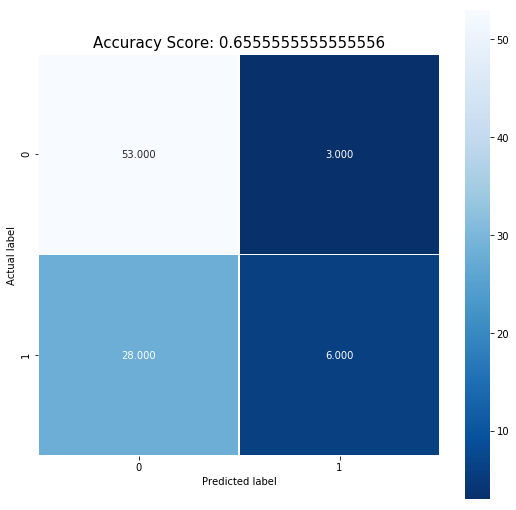

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [65]:
mcr = (cm[0][1]+cm[1][0])/sum(sum(cm))
print("Accuracy -",score*100,"\nMisclassification Rate -",mcr*100)

Accuracy - 65.55555555555556 
Misclassification Rate - 34.44444444444444


In [68]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77        56
           1       0.67      0.18      0.28        34

   micro avg       0.66      0.66      0.66        90
   macro avg       0.66      0.56      0.53        90
weighted avg       0.66      0.66      0.59        90



In [70]:
tpr = (cm[1][1])/(cm[1][1]+cm[1][0])
tnr = (cm[0][0])/(cm[0][1]+cm[0][0])
print(tpr,tnr)

0.17647058823529413 0.9464285714285714
